# Feature analysis
Let's first see the importance of the different features before any computation.

Text(0, 0.5, 'Feature')

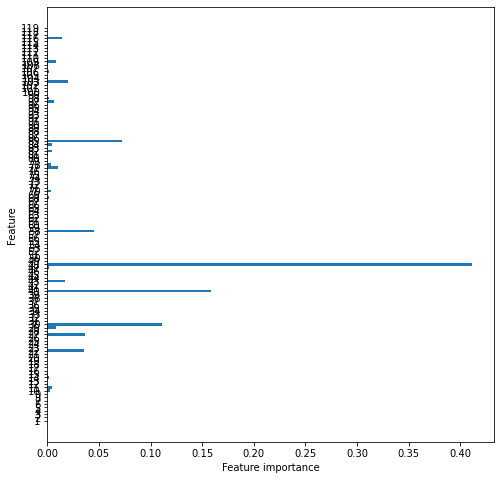

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection

gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = GradientBoostingClassifier(n_estimators=10,max_depth=10,min_samples_leaf=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Here we can see that all features have an impact on the decision but a few of them seem to have way more importance. Let's see what we get from selecting the best features for different dataset sizes.

In [7]:
feature_selection('../../../dumps/various_sizes/8K.csv', "gradient", 0.15)

Execution            # features  Features selected      Training set acc    Test acc    Time (s)
-----------------  ------------  -------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']              0.993856    0.993069    0.933683
K best features               1  ['f48']                        0.957152    0.954001    0.125912
Iterative process             1  ['f48']                        0.957152    0.954001    3.17836


The performances for the two first situations are quite similar even though a bit better for the first one in general. We can therefore conclude that in this case it's better to keep all the features, since even the last case provides slighlty worse results.

What happens when applying the same procedure on a bigger dataset of around 14K samples ?

In [6]:
feature_selection('../../../dumps/references/2020.03.11-17.39.csv',"gradient",0.15)

ValueError: at least one array or dtype is required

Except that the number of common features is smaller than with the Random Forests, the results are quite similar : a general improvement of around 4-5% and a huge (and bigger) drop in the case of the feature intersection.